In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

adata = sc.read_csv('data/S5000/noise_dropout_0.5.csv')

In [3]:
print(adata)
print("-----------------------")
print(adata.obs.head()) #cells
print("-----------------------")
print(adata.var.head()) #genes

AnnData object with n_obs × n_vars = 2001 × 5000
-----------------------
Empty DataFrame
Columns: []
Index: [, X1, X2, X3, X4]
-----------------------
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
#quality control og filter
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pp.filter_genes(adata, min_cells=3)

In [5]:
print(adata)
print("-----------------------")
print(adata.obs.head()) #cells
print("-----------------------")
print(adata.var.head()) #genes

AnnData object with n_obs × n_vars = 2001 × 5000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
-----------------------
    n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
                 5000                 8.517393    12502500.0   
X1               3028                 8.015988      327924.0   
X2               2990                 8.003363      162310.0   
X3               2728                 7.911691      140002.0   
X4               3004                 8.008033      144305.0   

    log1p_total_counts  pct_counts_in_top_50_genes  \
             16.341440                    1.989802   
X1           12.700541                    8.676096   
X2           11.997270  

In [ ]:
#normalize og log transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata) #mange 0er

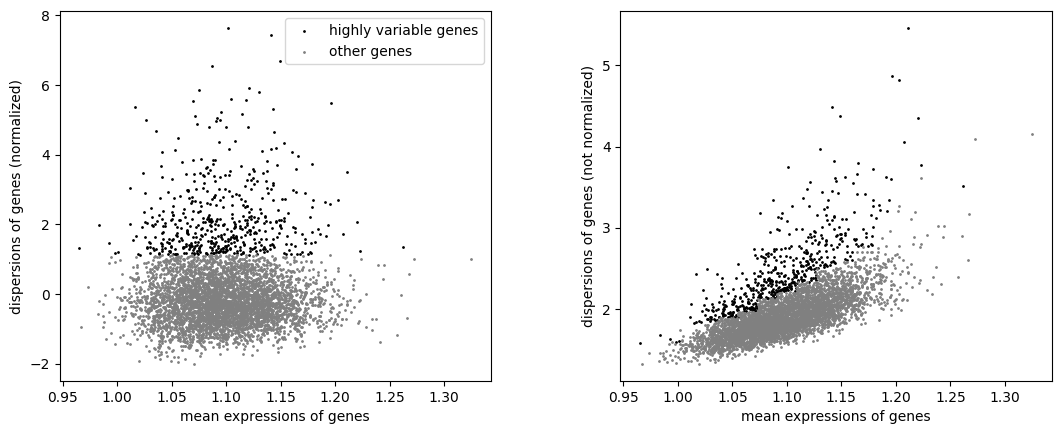

In [17]:
#find highly variable genes, som betyder at de har en stor varians og derfor er interessante
sc.pp.highly_variable_genes(adata, n_top_genes=500)
sc.pl.highly_variable_genes(adata)

In [20]:
print(adata)

AnnData object with n_obs × n_vars = 2001 × 5000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'


In [21]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X')
sc.tl.umap(adata)

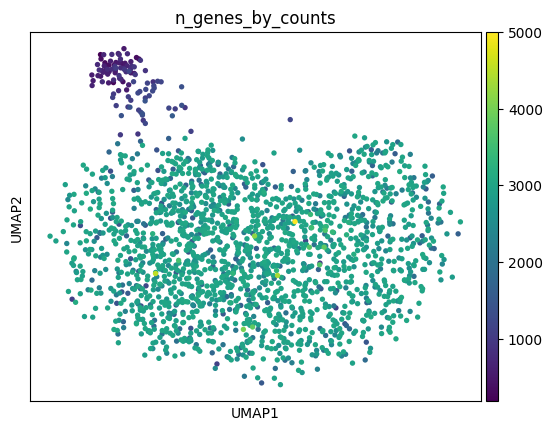

In [22]:
sc.pl.umap(adata, color='n_genes_by_counts')